In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw_data = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv') # Read data from URL


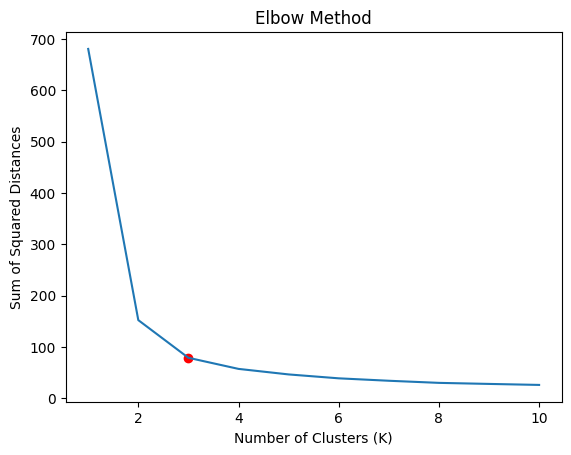

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract the features from the dataset
X = raw_data.iloc[:, :-1].values

# Calculate the sum of squared distances for different values of K
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), sse)
plt.scatter(3, sse[2], color='red', marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()






In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42) # Create an instance of the kmeans algorithm with 3 clusters because the elbow method suggests that 3 is the optimal number of clusters
kmeans.fit(X)
centres = kmeans.cluster_centers_ 

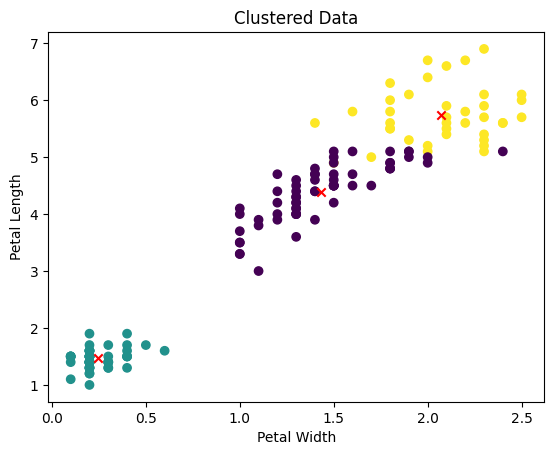

In [14]:
# Try visualising with Petal length and width
plt.scatter(raw_data['petal_width'], raw_data['petal_length'], c=kmeans.labels_)
plt.scatter(centres[:, 3], centres[:, 2], marker='x', color='red')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Clustered Data')
plt.show()


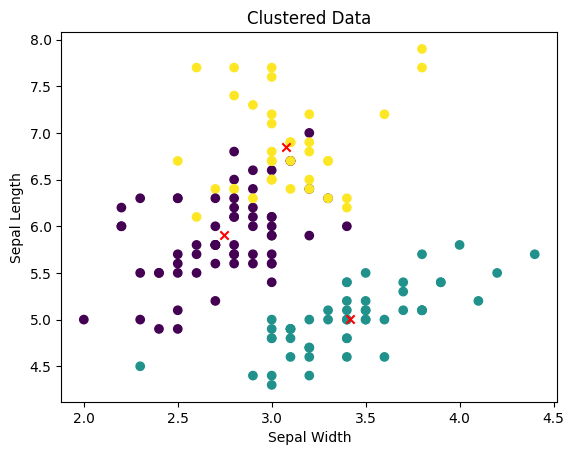

In [16]:
# Try plotting with Sepal
plt.scatter(raw_data['sepal_width'], raw_data['sepal_length'], c=kmeans.labels_)
plt.scatter(centres[:, 1], centres[:, 0], marker='x', color='red')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.title('Clustered Data')
plt.show()

In [ ]:
# We can use PCA to generate a dimension that best represents the data.

from sklearn.decomposition import PCA
pca = PCA() # Create an instance of the PCA model
pca.fit(X) # Fit the model to the data
cumulative_explained_variance = [] # Create an empty list to store the cumulative explained variance for each component
for i in range(1, 14): # Iterate through the number of components
    cumulative_explained_variance.append(sum(pca.explained_variance_ratio_[:i])) # Append the cumulative explained variance for each component to the list
plt.plot([x for x in range(1, 14)], cumulative_explained_variance, 'gs-') # Plot the cumulative explained variance against the number of components
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.plot([2], [cumulative_explained_variance[1]], 'ro', ms=12, mfc='r') # We will use 2 components for PCA as, although it doesn't have the highest cumulative explained variance, it means we can visualise the clusters in 2 dimensions.
plt.show()

In [19]:
pca = PCA(n_components=2) # Create an instance of the PCA model with 2 components
reduced_X = pd.DataFrame(data=pca.fit_transform(X.copy()), columns=['PCA-feature1', 'PCA-feature2']) # Create a dataframe from the reduced features.
centres_pca = pca.transform(centres) # Transform the coordinates of the centroids for each cluster using the PCA algorithm.

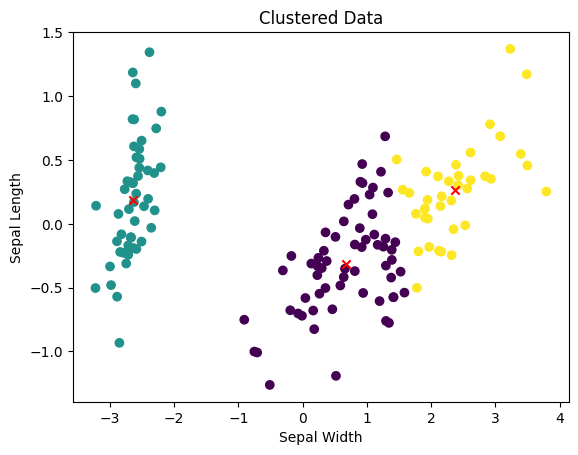

In [20]:
# Try plotting with Sepal
plt.scatter(reduced_X['PCA-feature1'], reduced_X['PCA-feature2'], c=kmeans.labels_)
plt.scatter(centres_pca[:, 0], centres_pca[:, 1], marker='x', color='red')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.title('Clustered Data')
plt.show()